In [1]:
from PIL import Image
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import imtools

im_path = 'D:\\dog_cat_images\\test\\'

# Chapter 1

- PIL
- MatplotLib
- NumPy
- Scipy
- Advanced examples

##  Into to PIL

- opening an image
- converting to grey scale
- making thumbnails
- copying and pasting regions
- resizing and rotating

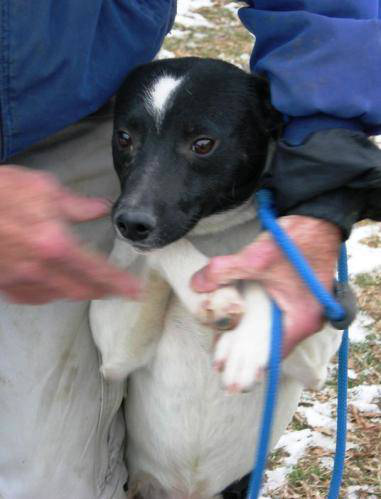

In [2]:
# open an image with PIL.Image
pil_im = Image.open(im_path+'1.jpg')
pil_im

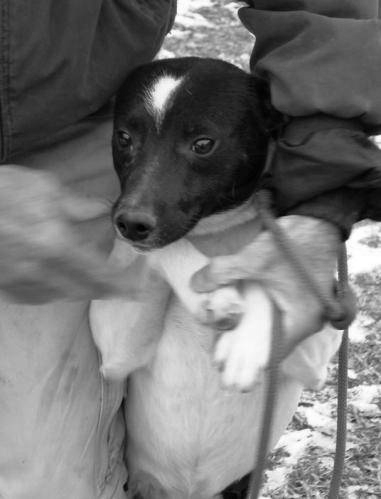

In [3]:
# convert to greyscale
pil_im.convert('L')

In [4]:
# copying and pasting
box = 100,100,300,300
region = pil_im.crop(box)
region = region.transpose(Image.ROTATE_180)
pil_im.paste(region,box)

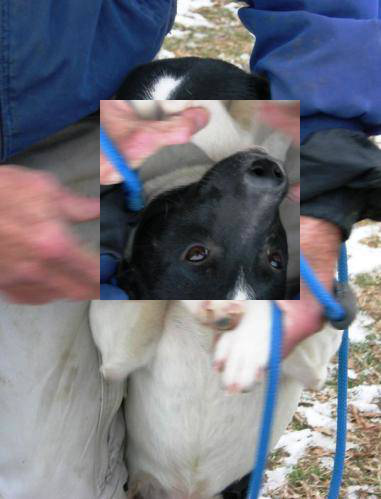

In [5]:
# display image after rotation
pil_im

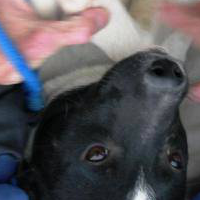

In [6]:
# display selected region
region

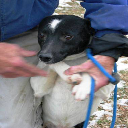

In [7]:
# resize an image
pil_im = Image.open(im_path+'1.jpg')
pil_im.resize((128,128))

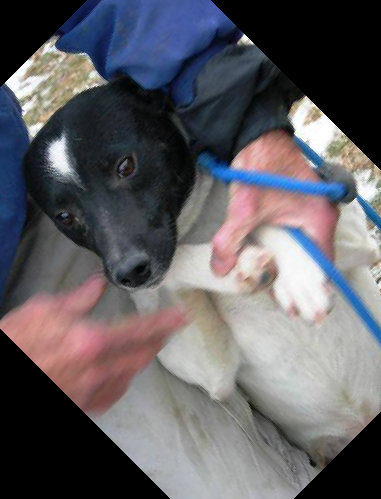

In [8]:
# rotate an image
out = pil_im.rotate(45)
out

## Images with MPL



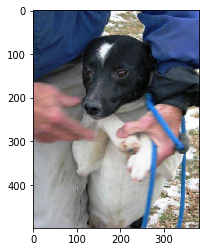

In [9]:
# convert image to array and show with plt
im = np.array(pil_im)
plt.imshow(im);
# turn off grib with
# plt.axis('off');

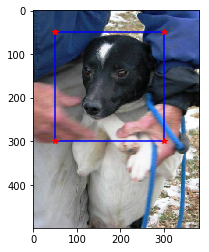

In [10]:
# drawing lines on images with plt
#box teh dog's head
x = [50,300,300,50,50]
y = [50,50,300,300,50]
plt.imshow(pil_im)
plt.plot(x, y, 'b') # line plot
plt.plot(x, y, 'r*') # markers

In [11]:
# get histogram of the image
im = np.array(Image.open(im_path + '1.jpg').convert('L'))

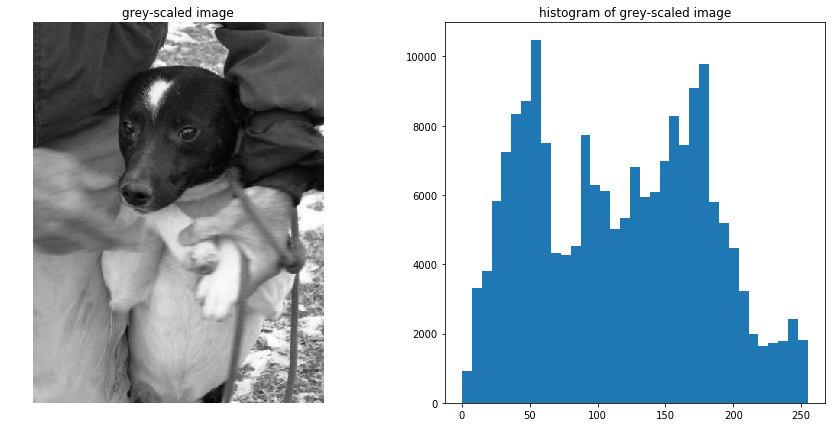

In [12]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (15,7))
ax1.imshow(im, cmap='gray');
ax1.axis('off');
ax1.set_title('grey-scaled image')
ax2.hist(im.flatten(), bins = 35);
ax2.set_title('histogram of grey-scaled image');

### Grey Level Transforms

In [13]:
im2 = 255-im
im3 = (100/255)*im + 100
im4 = 255 * (im/255)**2

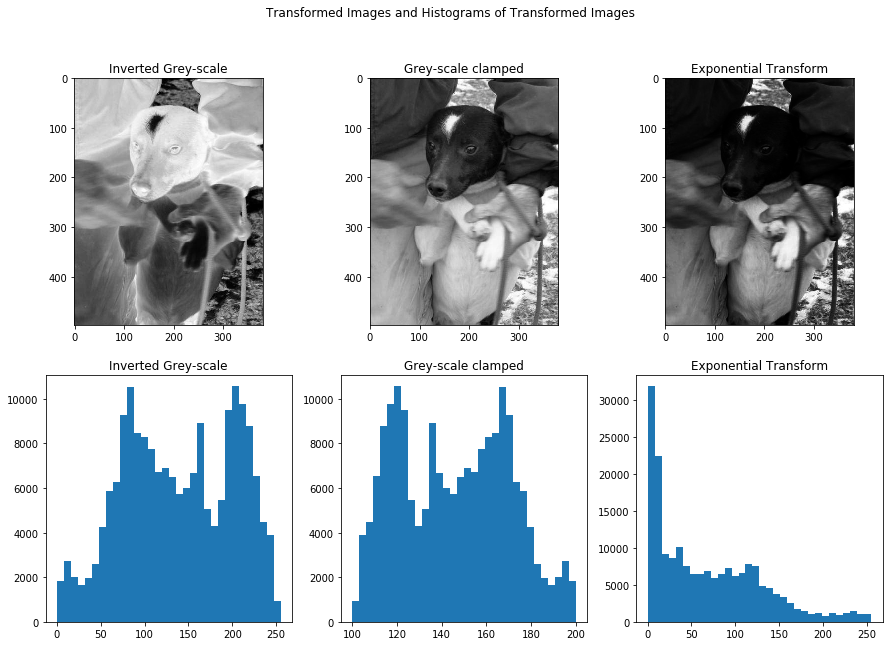

In [14]:
fig, [(ax1, ax2, ax3),(ax4, ax5, ax6)] = plt.subplots(ncols = 3, nrows = 2, figsize = (15,10))
ax1.imshow(im2, cmap='gray');
ax1.set_title('Inverted Grey-scale');
ax2.imshow(im3, cmap='gray');
ax2.set_title('Grey-scale clamped');
ax3.imshow(im4, cmap='gray');
ax3.set_title('Exponential Transform');

ax4.hist(im2.flatten(), bins = 32);
ax4.set_title('Inverted Grey-scale');
ax5.hist(im3.flatten(), bins = 32);
ax5.set_title('Grey-scale clamped');
ax6.hist(im4.flatten(), bins = 32);
ax6.set_title('Exponential Transform');
fig.suptitle('Transformed Images and Histograms of Transformed Images');

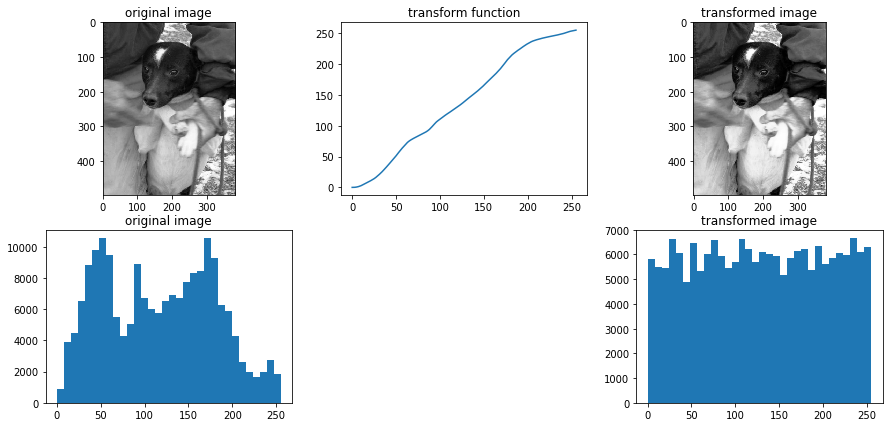

In [15]:
im2, cdf = imtools.equalize_hist(im)
fig, [ax, ax2] = plt.subplots(ncols = 3, nrows = 2, figsize = (15,7))

ax[0].imshow(im, cmap='gray');
ax[0].set_title('original image');
ax[1].plot(cdf)
ax[1].set_title('transform function');
ax[2].imshow(im2, cmap='gray');
ax[2].set_title('transformed image');


ax2[0].hist(im.flatten(), 32);
ax2[0].set_title('original image');
ax2[1].axis('off')
ax2[2].hist(im2.flatten(), 32);
ax2[2].set_title('transformed image');


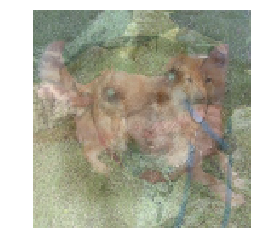

In [16]:
# average images
im_paths = [im_path+'1.jpg', im_path+'2.jpg', im_path+'3.jpg', im_path+'4.jpg']
resize = (128,128)

plt.imshow(imtools.im_average(im_paths, resize = resize));
plt.axis('off');

### Scipy Image Filters

In [17]:
from scipy.ndimage import filters
im2 = filters.gaussian_filter(im3,3)

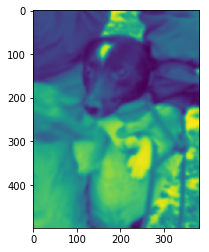

In [18]:
plt.imshow(im2)

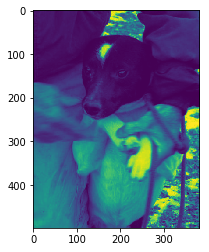

In [19]:
imx = np.zeros(im4.shape)
imy = np.zeros(im4.shape)

filters.sobel(im4,1,imx)
filters.sobel(im4,0,imy)

mag = np.sqrt(imx**2+imy**2)

plt.imshow(im4)

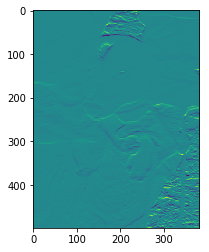

In [20]:
plt.imshow(imy)

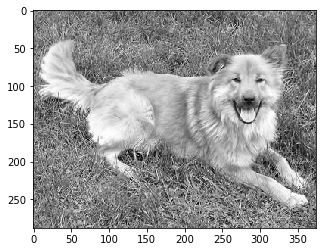

In [21]:
im4 = np.array(Image.open(im_path+'4.jpg').convert('L'))

imx = np.zeros(im4.shape)
imy = np.zeros(im4.shape)

sigma = 2

filters.gaussian_filter(im4,(sigma,sigma),(0,1),imx)
filters.gaussian_filter(im4,(sigma,sigma),(1,0),imy)

mag = np.sqrt(imx**2+imy**2)

plt.imshow(im4, cmap = 'gray')

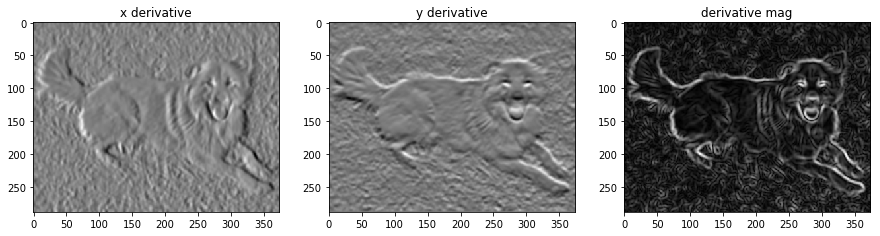

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize = (15,7.5))
ax1.imshow(imx, cmap = 'gray')
ax1.set_title('x derivative')
ax2.imshow(imy, cmap = 'gray')
ax2.set_title('y derivative')
ax3.imshow(mag, cmap = 'gray')
ax3.set_title('derivative mag');

### Morphology and Measurements

In [23]:
from scipy.ndimage import measurements, morphology

In [24]:
im = 1*(im4>128)
labels, num_objects = measurements.label(im)

In [25]:
l = labels/np.max(labels)

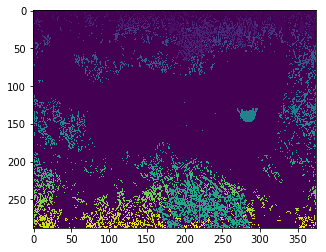

In [26]:
plt.imshow(l)

### Denoise

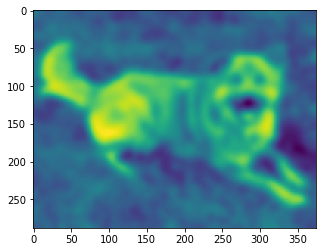

In [48]:
im2 = filters.gaussian_filter(im4,5)
plt.imshow(im2)

In [49]:
U, T = imtools.denoise(im2,im2)

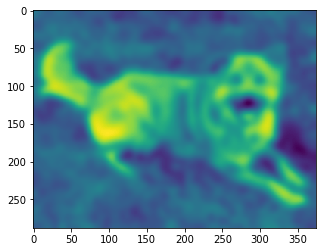

In [52]:
plt.imshow(U)